# Trabajo Practico de Laboratorio N°1

## Autor: Guzmán Pedro

### Objetivos

* Consolidar los conceptos de teoría moderna mediante la implementación circuital.
* Simular e implementar el filtro con componentes activos OPAMP/OTA.
* Medir las partes de la función transferencia en un ancho de banda de 10 a 100 kHz.


A nuestro grupo nos toco diseñar el siguiente filtro NOTCH, hicimos una modificacion para ser mas exigentes e hicimos el ancho de banda de eliminacion a 1dB

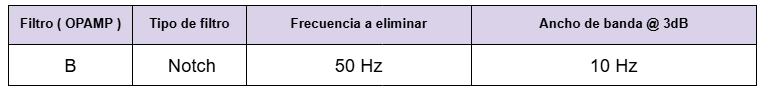

Para ello recurrimos a la estructura Ackerberg-Mossberg y sacamos la transferencia tomando como si fueran los dos capacitores distintos. En la practica antes de llegar a los valores de diseño, medimos unos capacitores con un instrumento llamado LCR lo cual te da el valor del capacitor a distintas frecuencias, nosotros los medimos en la frecuencia de 100Hz ya que era la menor y la mas cercana a la frecuencia de eliminación del filtro

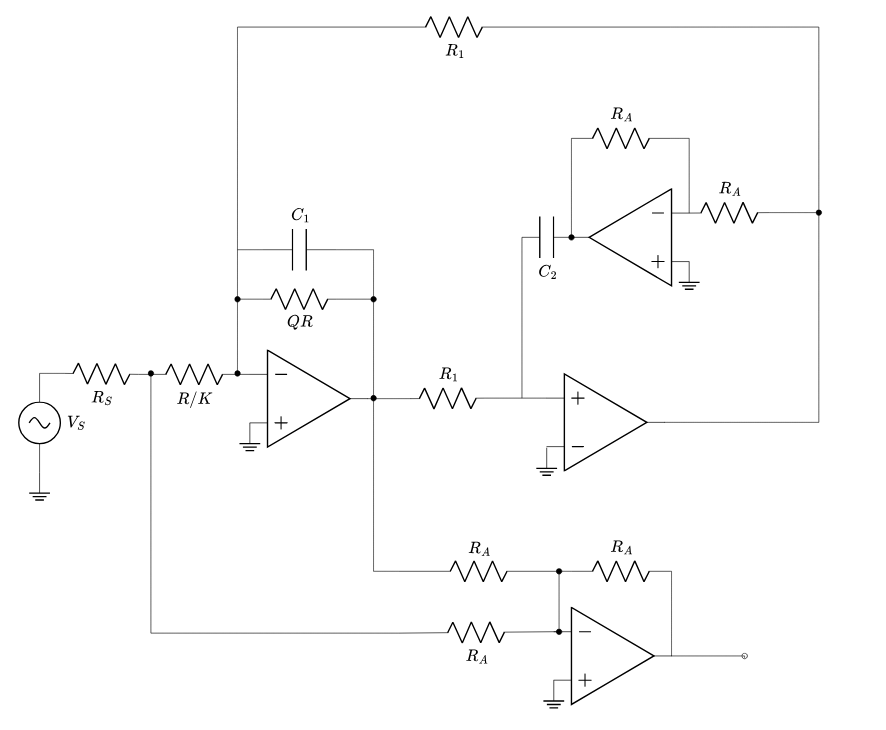

En nuestro diseño optamos las $R_A$ de valor de $10k\Omega$ ademas esta decision nos permite eliminar algunos terminos del Ackerber-Mossberg con ceros transmision con suma.

Como es un filtro NOTCH la transferencia nos quedo:

$T(s)=-\frac{s^2+\frac{1}{R_1^2C_1C_2}}{s^2+s\frac{1}{QR_1C_1}+\frac{1}{R_1^2C_1C_2}}$

Donde se decidio diseñar el valor de $KQ=1$ asi entonces los resistores $\frac{R}{K}$ y $QR$ son iguales.

Al medir los capacitores con el LCR nos dio que $C1=936.1nF$ y $C2=921.0nF$ por lo tanto al calcular la frecuencia de eliminacion que es 50Hz entonces no queda una $R_1=R$ de valor: 

$R_1=\sqrt{\frac{1}{2\pi(50Hz)C_1C_2}}=3428\Omega$ y calculando Q como:

$Q = \frac{50Hz}{10Hz\sqrt{q^2-1}}=9.8$ donde $q=10^{1/20}$

Se ve que es un Q mayor a 5 lo que hace que los polos esten muy cerca del eje jw, osea elevado y puede traer problemas de estabilidad, aun asi se prosigue con el diseño. El 10 en el denominador de Q es el ancho de banda de eliminación.

Con el valor de Q se saca la resistencia de valor $QR=\frac{R}{K}=33685\Omega$

Con esto tenemos todos los valores de el diseño de nuestro circuito, procedemos a simularlo para verificar su funcionamiento. Decidimos utilizar operacionales TL084 ya que en un mismo encapsulado vienen cuatro operacionales y los alimentamos con una fuente partida de mas/menos 9V

### Simulación del circuito en LTSPICE
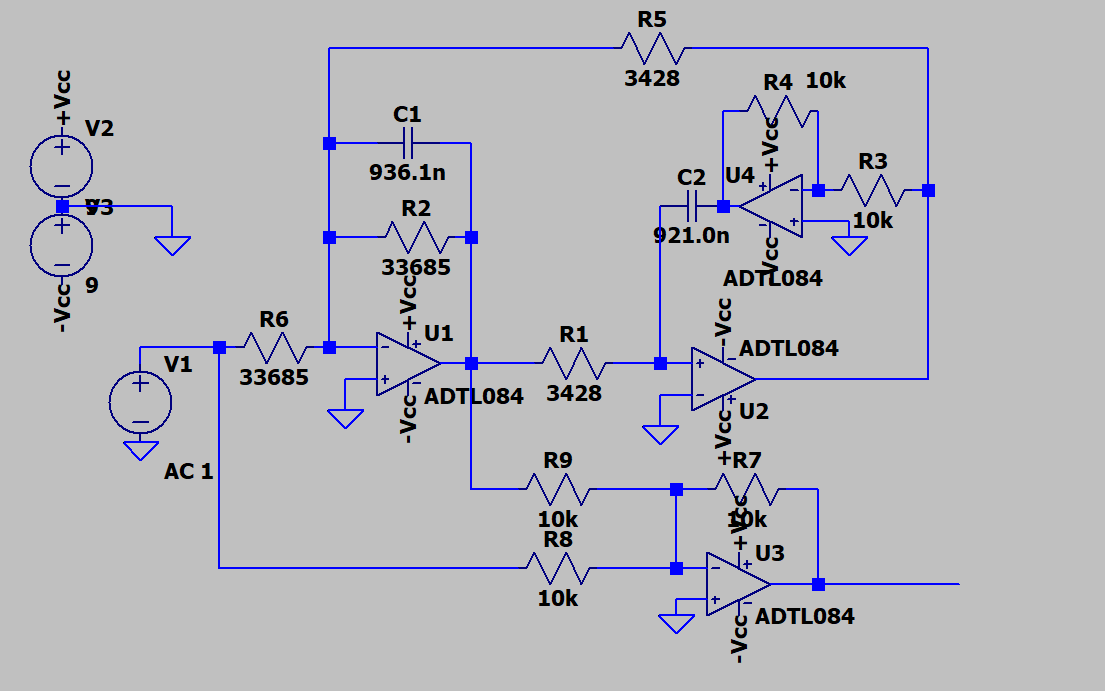
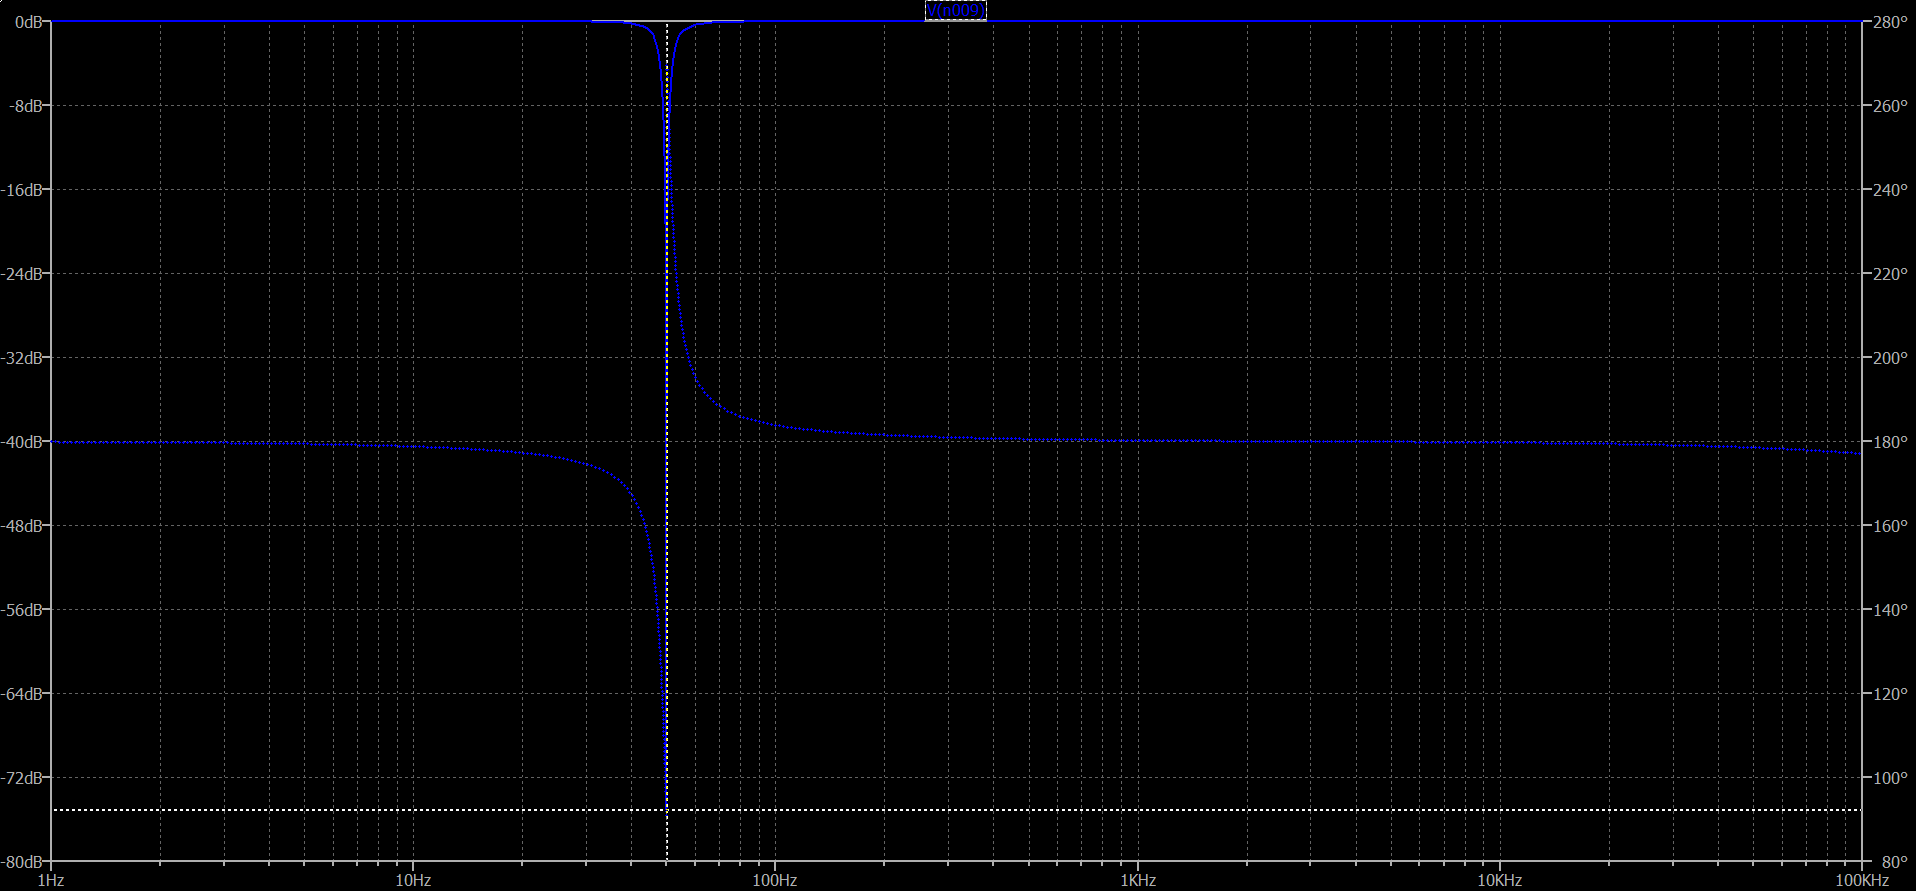
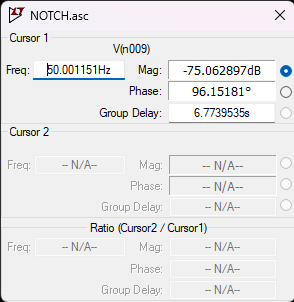

Se puede ver que el circuito simulado elimina perfectamente la frecuencia de 50Hz. Entonces la simulación del mismo verifica. Procedemos a los datos tomados del laboratorio.


### Analisis de Valores tomados en el laboratorio

Se hace el analisis de los archivos .csv que nos entrego el analizador de audio y se compara con el valor obtenido con el barrido manual y el osciloscopio.

C:\Users\pedro\AppData\Local\Temp\ipykernel_20056\339781665.py:5: ConversionWarning: Some errors were detected !
    Line #1 (got 1 columns instead of 2)
    Line #2 (got 1 columns instead of 2)
    Line #105 (got 1 columns instead of 2)
    Line #106 (got 1 columns instead of 2)
  data1 = np.genfromtxt("Sweep_Data_0.csv", delimiter=",", usecols=(0, 1), invalid_raise=False) #Amplitud
C:\Users\pedro\AppData\Local\Temp\ipykernel_20056\339781665.py:6: ConversionWarning: Some errors were detected !
    Line #1 (got 1 columns instead of 2)
    Line #2 (got 1 columns instead of 2)
    Line #105 (got 1 columns instead of 2)
    Line #106 (got 1 columns instead of 2)
  data2 = np.genfromtxt("Sweep_Data_1.csv", delimiter=",", usecols=(0, 1), invalid_raise=False) #Fase


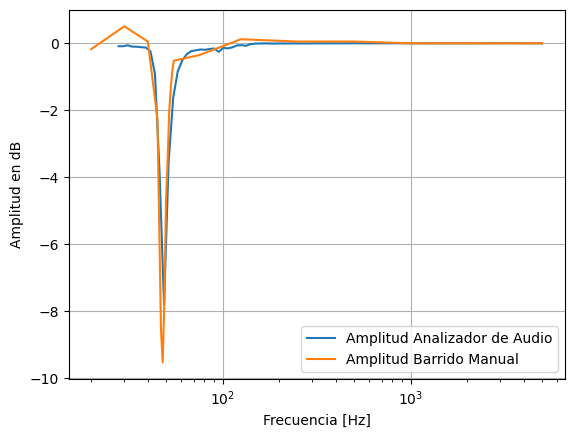

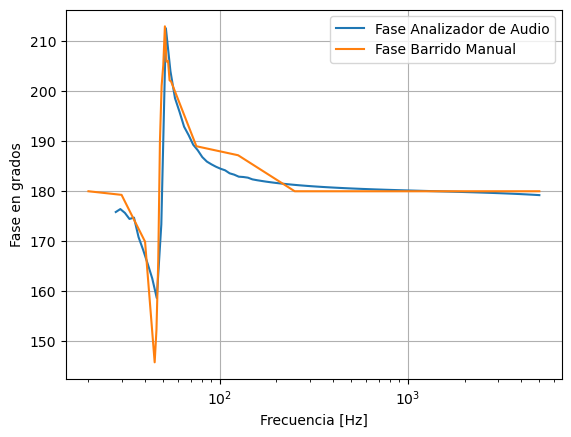

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

data1 = np.genfromtxt("Sweep_Data_0.csv", delimiter=",", usecols=(0, 1), invalid_raise=False) #Amplitud
data2 = np.genfromtxt("Sweep_Data_1.csv", delimiter=",", usecols=(0, 1), invalid_raise=False) #Fase

f = data1[108: , 0]
AmplituddB = data1[108: , 1] 
Fase = data2[108: , 1] 

Vref=5
fp=np.array([20,30,40,45,46,47,48,49,50,51,52,53,54,55,75,125,250,500,1e3,2e3,5e3])
Vp=np.array([4.9,5.3,5.03,3.86,2.68,1.87,1.67,2.07,2.92,3.35,3.96,4.28,4.55,4.71,4.8,5.07,5.03,5.03,5,5,5])
DT=np.array([25*1e-3,16.6*1e-3,11.8*1e-3,9*1e-3,9.2*1e-3,9.8*1e-3,11*1e-3,11.4*1e-3,11.4*1e-3,11.6*1e-3,11*1e-3,10.8*1e-3,10.4*1e-3,10.2*1e-3,7*1e-3,4.16*1e-3,2*1e-3,1*1e-3,0.5*1e-3,0.25*1e-3,0.1*1e-3])
AmplituddBPractica = 20*np.log10(Vp/Vref)
FasePractica = 360*DT*fp
plt.figure()
plt.plot(f, AmplituddB,label="Amplitud Analizador de Audio")
plt.plot(fp, AmplituddBPractica,label="Amplitud Barrido Manual")
plt.xscale("log")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud en dB")
plt.legend()
plt.grid()
Fase[11:71] += 360 ##Correcion de fase de algunos elementos de saltos bruscos por ruido.
plt.figure()
plt.plot(f, Fase, label="Fase Analizador de Audio")
plt.plot(fp, FasePractica, label="Fase Barrido Manual")
plt.xscale("log")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase en grados")
plt.legend()
plt.grid()


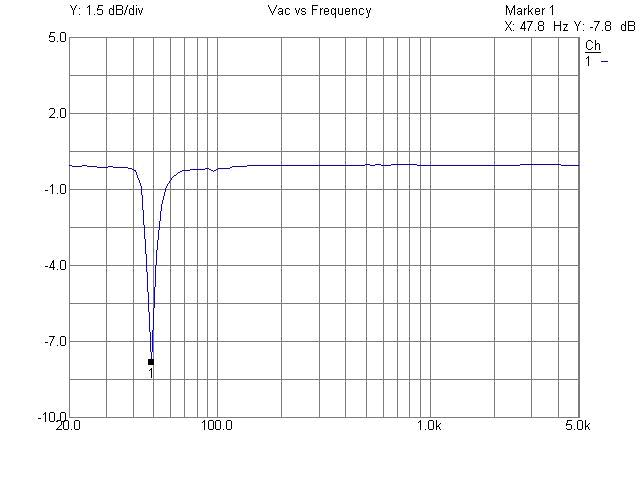![image.png](attachment:9cbd1ed0-22ac-4b8c-8398-80f006e36b0c.png)

In [2]:


# Encontrar amplitud mínima y su índice
amplitud_min_audio = np.min(AmplituddB)
indice_min_audio = np.argmin(AmplituddB)

# Obtener frecuencia correspondiente
frecuencia_min_audio = f[indice_min_audio]


# Encontrar amplitud mínima y su índice
amplitud_min = np.min(AmplituddBPractica)
indice_min = np.argmin(AmplituddBPractica)

# Obtener frecuencia correspondiente
frecuencia_min = fp[indice_min]

print(f"Analizador de Audio:")
print(f"Amplitud mínima: {amplitud_min_audio} dB")
print(f"Frecuencia correspondiente: {frecuencia_min_audio} Hz")

print(f"Barrido Manual:")
print(f"Amplitud mínima: {amplitud_min} dB")
print(f"Frecuencia correspondiente: {frecuencia_min} Hz")

Analizador de Audio:
Amplitud mínima: -7.82132698964789 dB
Frecuencia correspondiente: 48.8175360507618 Hz
Barrido Manual:
Amplitud mínima: -9.52507066376871 dB
Frecuencia correspondiente: 48.0 Hz


### Conclusiones

Se puede ver entonces que si bien nuestro diseño no atenuo perfectamente los 50Hz se acerco bastante y si bien no se logro la atenuacion simulada, se logro eliminar bastante parte de la señal de esa frecuencia y dejar intacta las demas, se puede visualizar ademas el cambio de fase brusco que genera el cero de transmisión cercana a la zona de la frecuencia a eliminar, considero un exito esta practica de laboratorio porque pudimos llevar los conceptos teoricos vistos en clase a un diseño practico y real, se obtiene un aprendizaje y mejoras para futuros diseños de filtros.